<a href="https://colab.research.google.com/github/ElChori1/Training-ia/blob/main/Frecuencia_de_compra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOPEZ ALEXIS URIEL

In [ ]:
#Importamos librería
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy

In [ ]:
tablaclientes= pd.read_csv("customer_data.csv", sep= ",")
tablaclientes.head(10)

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
5,Charles Smith,24,Female,PhD,61444,Libyan Arab Jamahiriya,1.0,18072.200
6,Misty Moody,58,Male,PhD,78024,Italy,0.9,21511.080
7,Brian Kent,34,Male,High School,32225,Pakistan,0.7,6727.875
8,Stacie Ray,63,Male,PhD,63664,Venezuela,0.4,9273.280
9,Brian Townsend,64,Female,High School,45043,San Marino,1.0,16252.150


In [ ]:
tablaclientes.tail(10)

,name,age,gender,education,income,country,purchase_frequency,spending
990,William Wright,51,Female,High School,49951,Poland,0.3,4949.265
991,Joanne Watson,43,Female,High School,52276,Turks and Caicos Islands,0.4,5845.520
992,Vincent Wallace,25,Male,PhD,84339,Benin,0.7,12051.865
993,Jennifer Malone,34,Male,High School,92407,British Virgin Islands,0.7,8834.245
994,Laura Wright MD,27,Female,Bachelor,26321,Ecuador,0.5,7158.025
995,Jason Haas,42,Female,PhD,98170,Bosnia and Herzegovina,0.7,17435.950
996,Sharon Valdez,39,Male,High School,59174,Eritrea,0.9,11662.830
997,Andrew Taylor,50,Male,Master,59808,Serbia,0.4,7196.160
998,Jessica Johnson,50,Female,Master,58272,Cyprus,0.7,13939.520
999,Brian Williams,38,Female,Bachelor,32512,Turkey,0.5,8312.800


In [ ]:
tablaclientes.isnull().sum() #No existen campos vacíos

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

In [ ]:
tablaclientes.rename(columns={"name":"Nombre",
                              "age":"Edad",
                              "gender":"Genero",
                              "education":"Educación",
                              "income":"Salario",
                              "country":"País",
                              "purchase_frequency": "Frecuencia de compra",
                              "spending":"Consumo"},inplace =True)

In [ ]:
tablaclientes.shape
print("filas {} columnas {}".format(tablaclientes.shape[0],tablaclientes.shape[1]))
tablaclientes.dtypes

filas 1000 columnas 8


Nombre                   object
Edad                      int64
Genero                   object
Educación                object
Salario                   int64
País                     object
Frecuencia de compra    float64
Consumo                 float64
dtype: object

**Países con más Frecuencia de Compras**


Congo                12
Palau                11
Slovenia             10
Algeria               9
Ukraine               9
                     ..
Equatorial Guinea     1
Solomon Islands       1
Niger                 1
Botswana              1
Sudan                 1
Name: País, Length: 239, dtype: int64

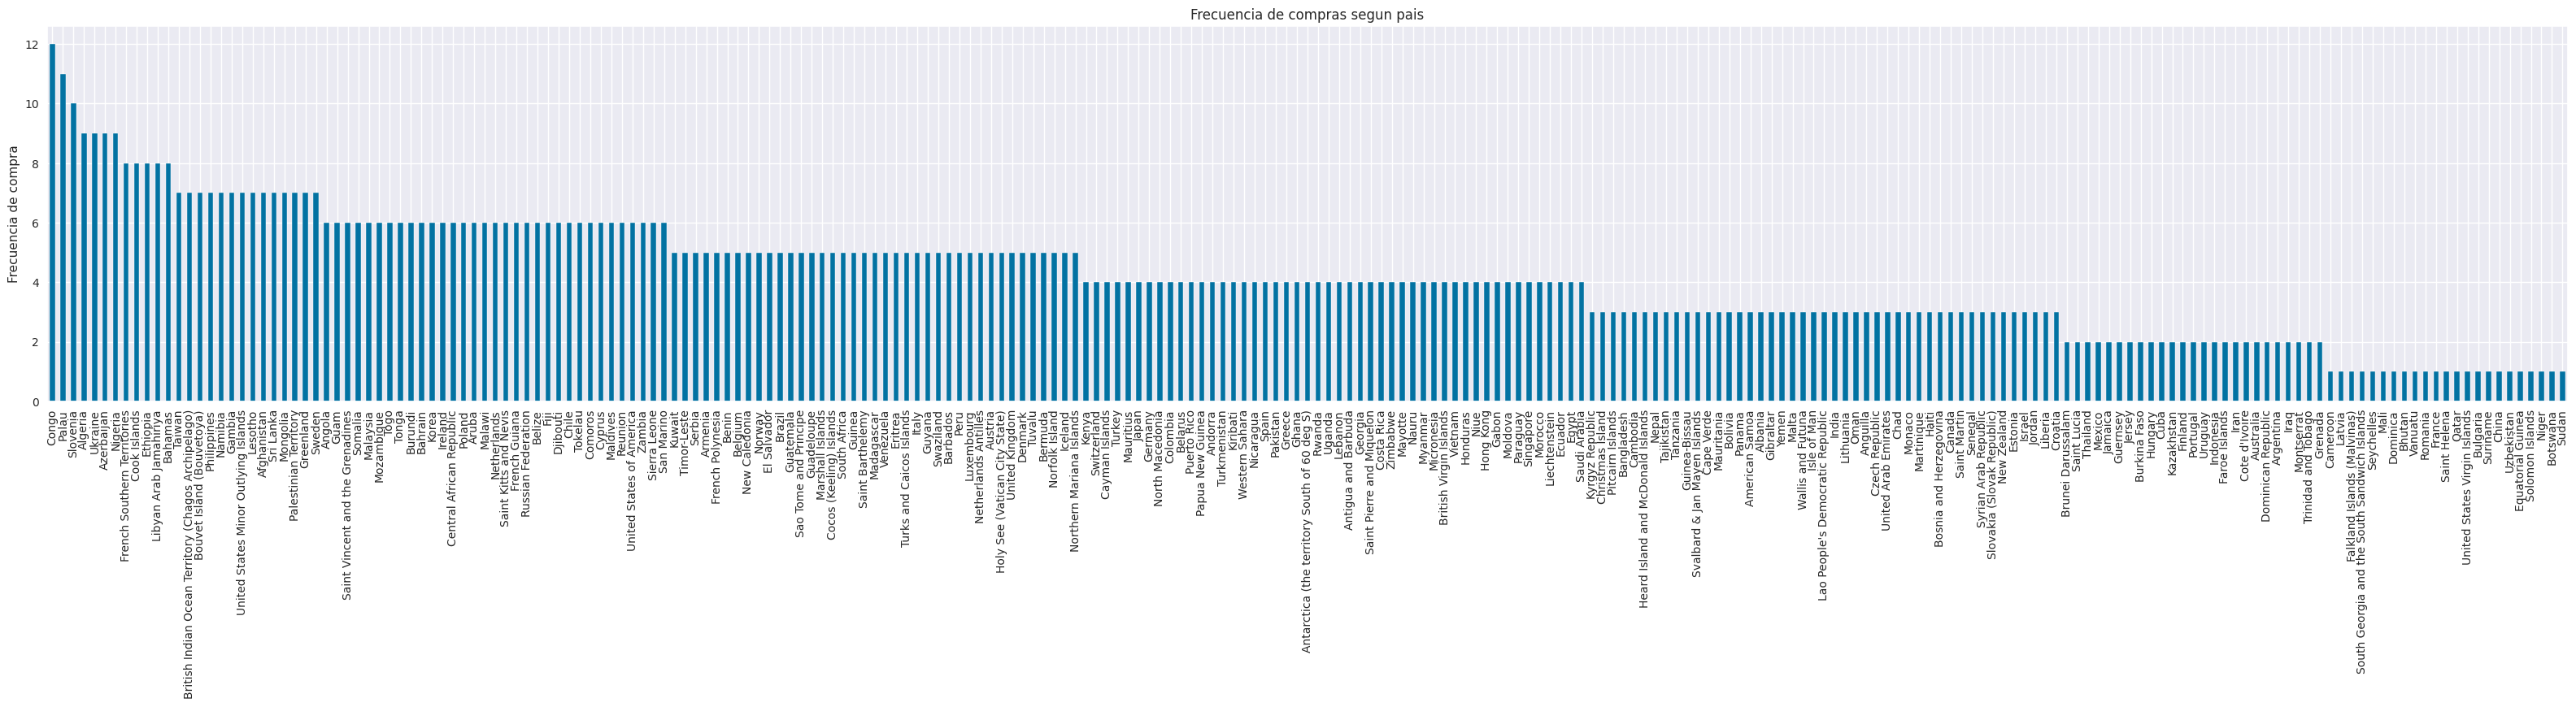

In [ ]:
tablaclientes['País'].value_counts().plot(kind='bar', figsize=(40,6), ylabel='Frecuencia de compra', title='Frecuencia de compras segun pais');
tablaclientes['País'].value_counts()

**Nivel académico con más frecuencia de compras**

Bachelor       271
PhD            248
High School    245
Master         236
Name: Educación, dtype: int64

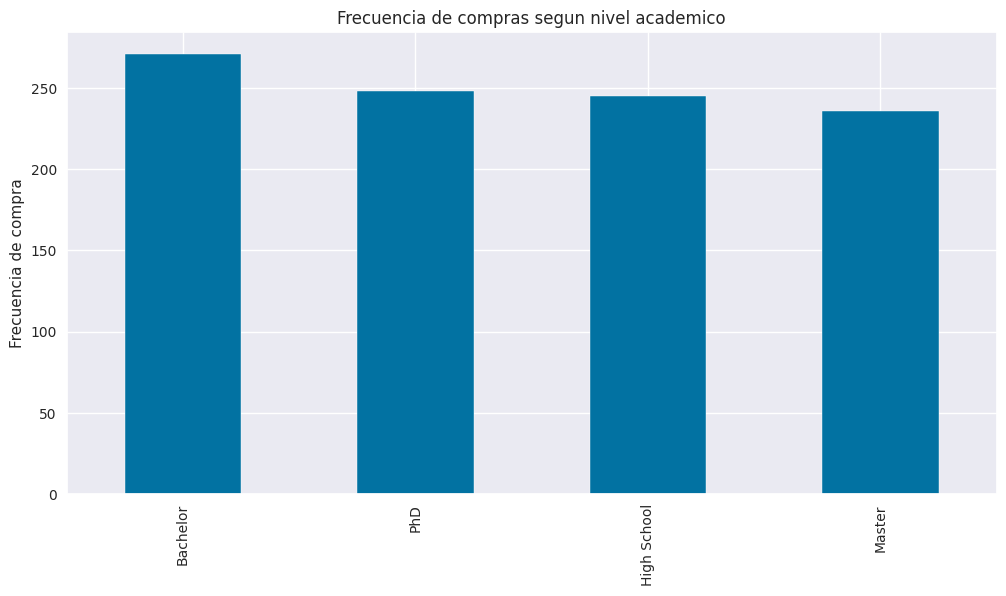

In [ ]:
tablaclientes['Educación'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia de compra', title='Frecuencia de compras segun nivel academico');
tablaclientes['Educación'].value_counts()

**Frecuencia según el genero**

Male      501
Female    499
Name: Genero, dtype: int64

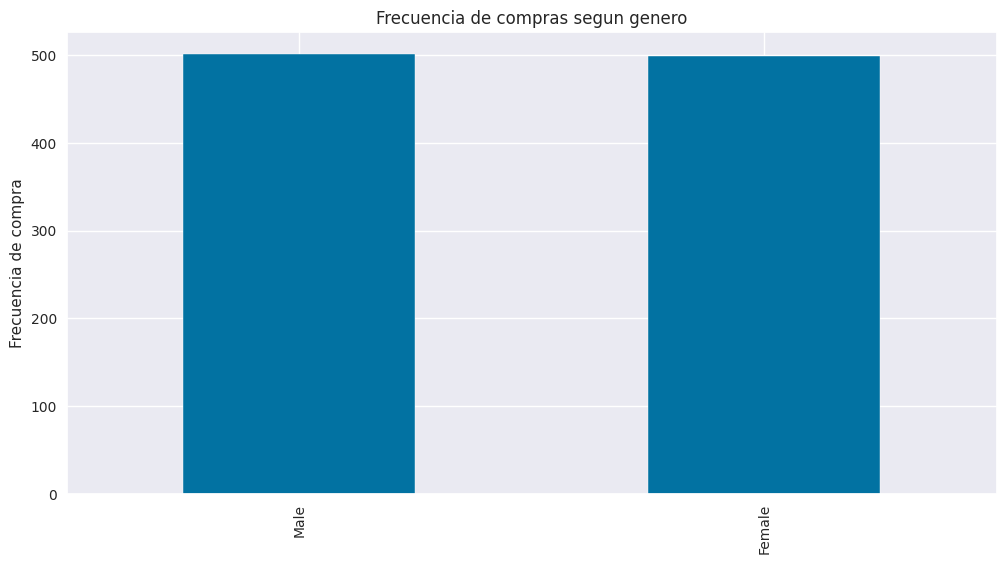

In [ ]:
tablaclientes['Genero'].value_counts().plot(kind=    'bar', figsize=(12,6), ylabel='Frecuencia de compra', title='Frecuencia de compras segun genero');
tablaclientes['Genero'].value_counts()

**MODA**

In [ ]:
#calculo moda en edad para saber a que publico se apunta
print("Edad del público: ", tablaclientes['Edad'].mode())
print("----------------------")
#calculo moda en país para ver a donde esta el publico que mas consume
print("País donde más se consume: ", tablaclientes['País'].mode())
print("----------------------")

Edad del público:  0    50
Name: Edad, dtype: int64
----------------------
País donde más se consume:  0    Congo
Name: País, dtype: object
----------------------


In [ ]:
tablaclientes.describe()

,Edad,Salario,Frecuencia de compra,Consumo
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


**COVARIANZA Y CORRELACIÓN**

------MATRIZ DE COVARIANZA------


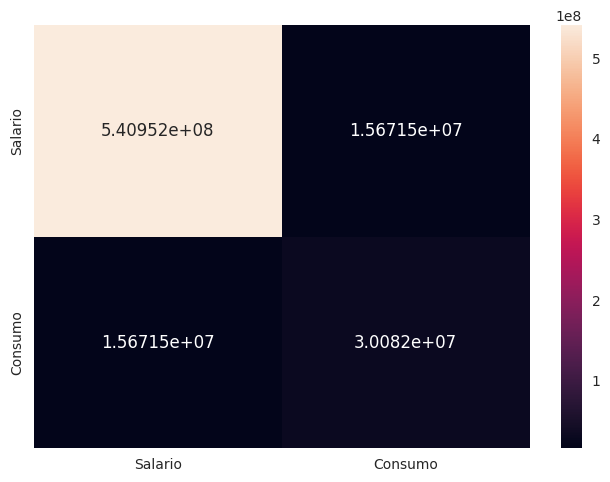

In [ ]:
# Calculamos la covarianza:
cov = np.cov([tablaclientes['Salario'], tablaclientes['Consumo']])
#En este caso es positiva, por lo que nos indica que a medida que el salario sube, el consumo sube con el mismo

print("------MATRIZ DE COVARIANZA------")
labs = ['Salario', 'Consumo']
sns.heatmap (cov, annot = True, fmt = 'g', xticklabels = labs, yticklabels = labs)
plt.show ()

In [ ]:
# Calculamos la matriz de correlacion:
np.corrcoef(tablaclientes['Consumo'], tablaclientes['Edad'])

array([[1.        , 0.23420074],
       [0.23420074, 1.        ]])

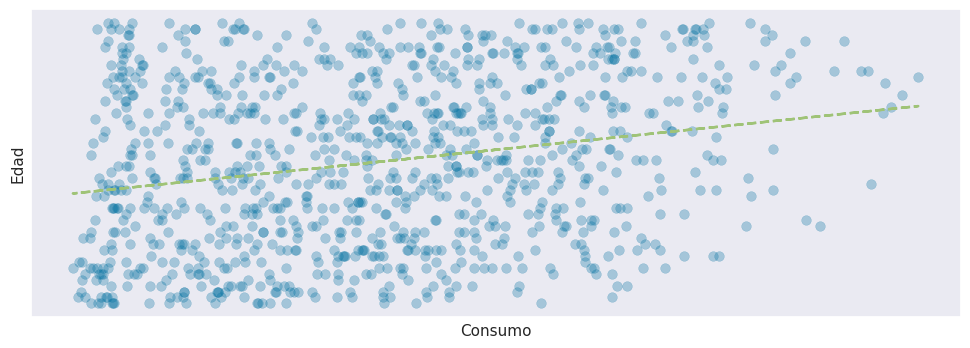

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.scatter(x=tablaclientes.Consumo, y=tablaclientes.Edad, alpha= 0.3)
ax.set_xlabel('Consumo')
ax.set_ylabel('Edad')
plt.grid() # agregamos una cuadricula
plt.xticks([]) #Los ticks son las marcas de cada eje, al darle el valor nulo '[]' nos aseguramos de que no haya marcas en el eje
plt.yticks([]) # repito lo mismo para el eje y


#Estas dos lineas hacen una regresion lineal
trend = np.polyfit(tablaclientes.Consumo, tablaclientes.Edad,1)
trendpoly = np.poly1d(trend) # para mostrar la recta mas representativa de los puntos
# Entre mas cerca esten los puntos de la recta mas fuerte sera la correlacion, de todas formas se puede observar que existe una dispersión monotona,
#por lo que no tendría tanto sentido analizarla

plt.plot(tablaclientes.Consumo,trendpoly(tablaclientes.Consumo),  'g--') #plt.plot se encarga de mostrar la recta en la figura

plt.show()

**Histogramas de cada columna**

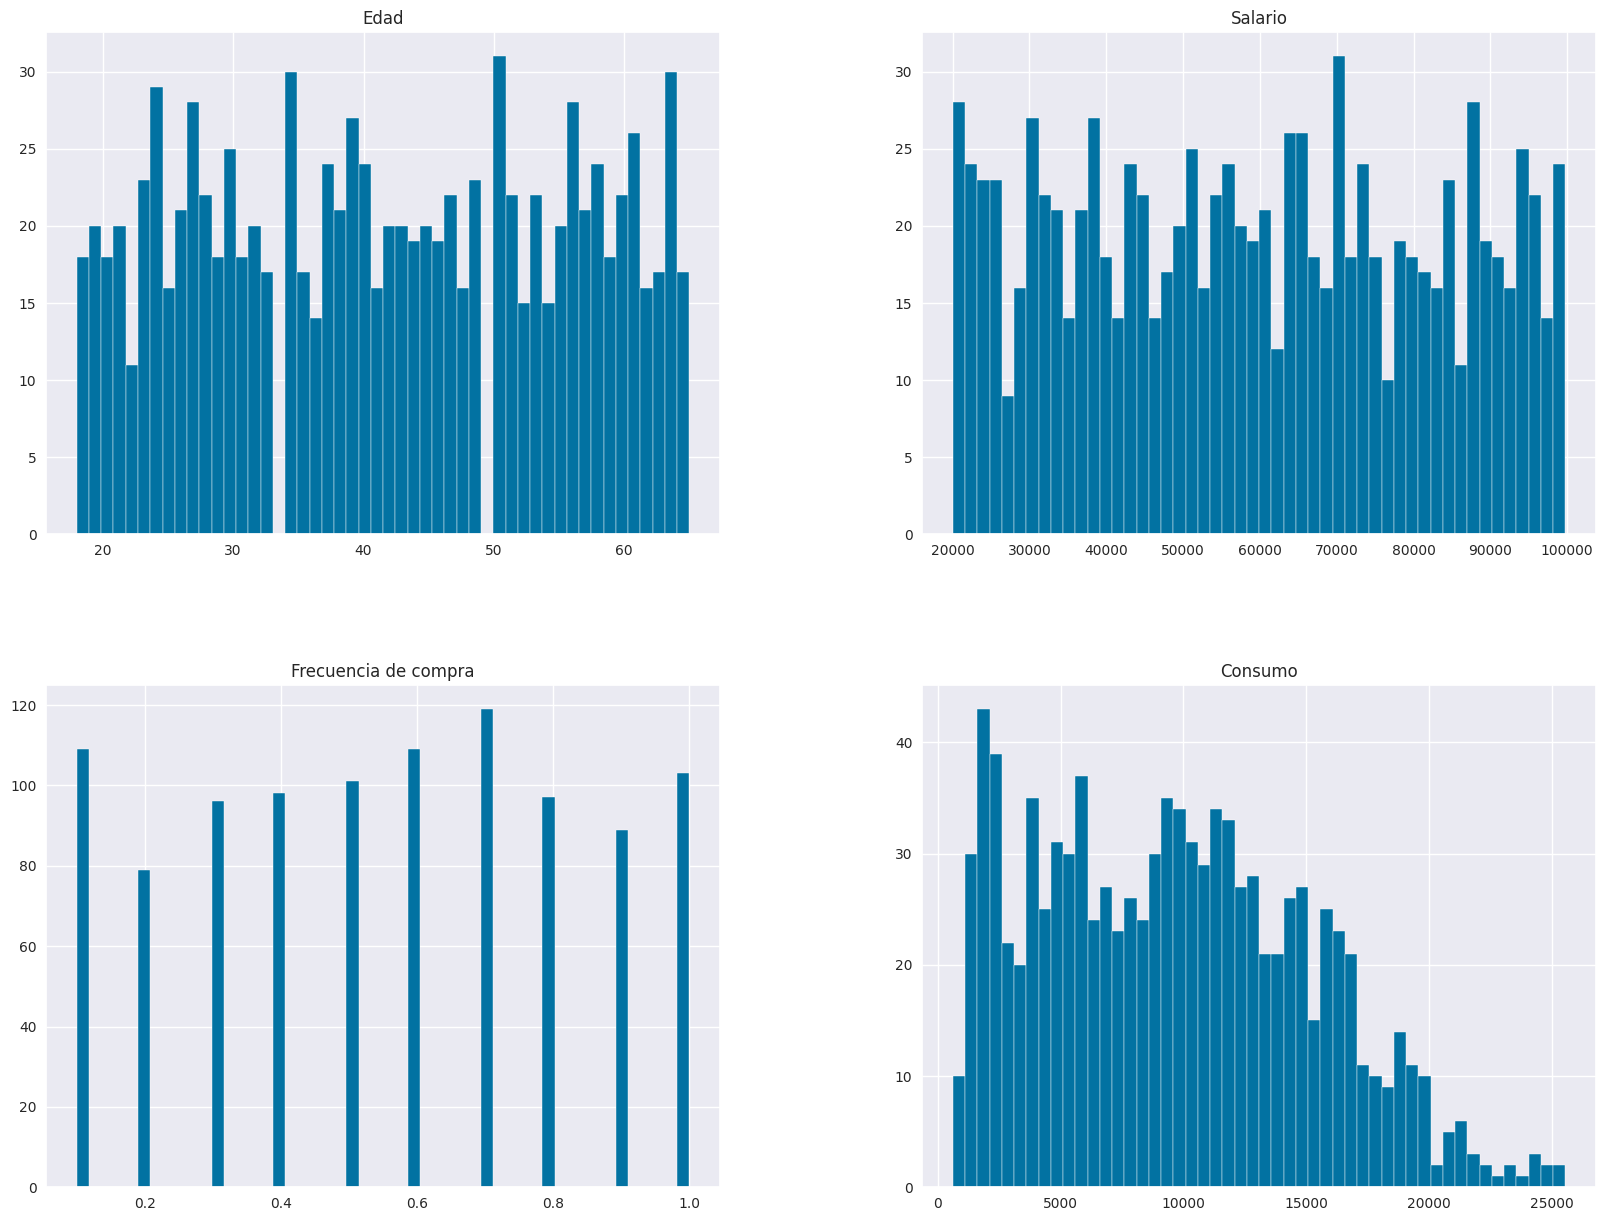

In [ ]:
tablaclientes.hist(bins=50, figsize=(20,15))
plt.show()

**Histograma por Genero teniendo en cuenta Salario y Consumo**

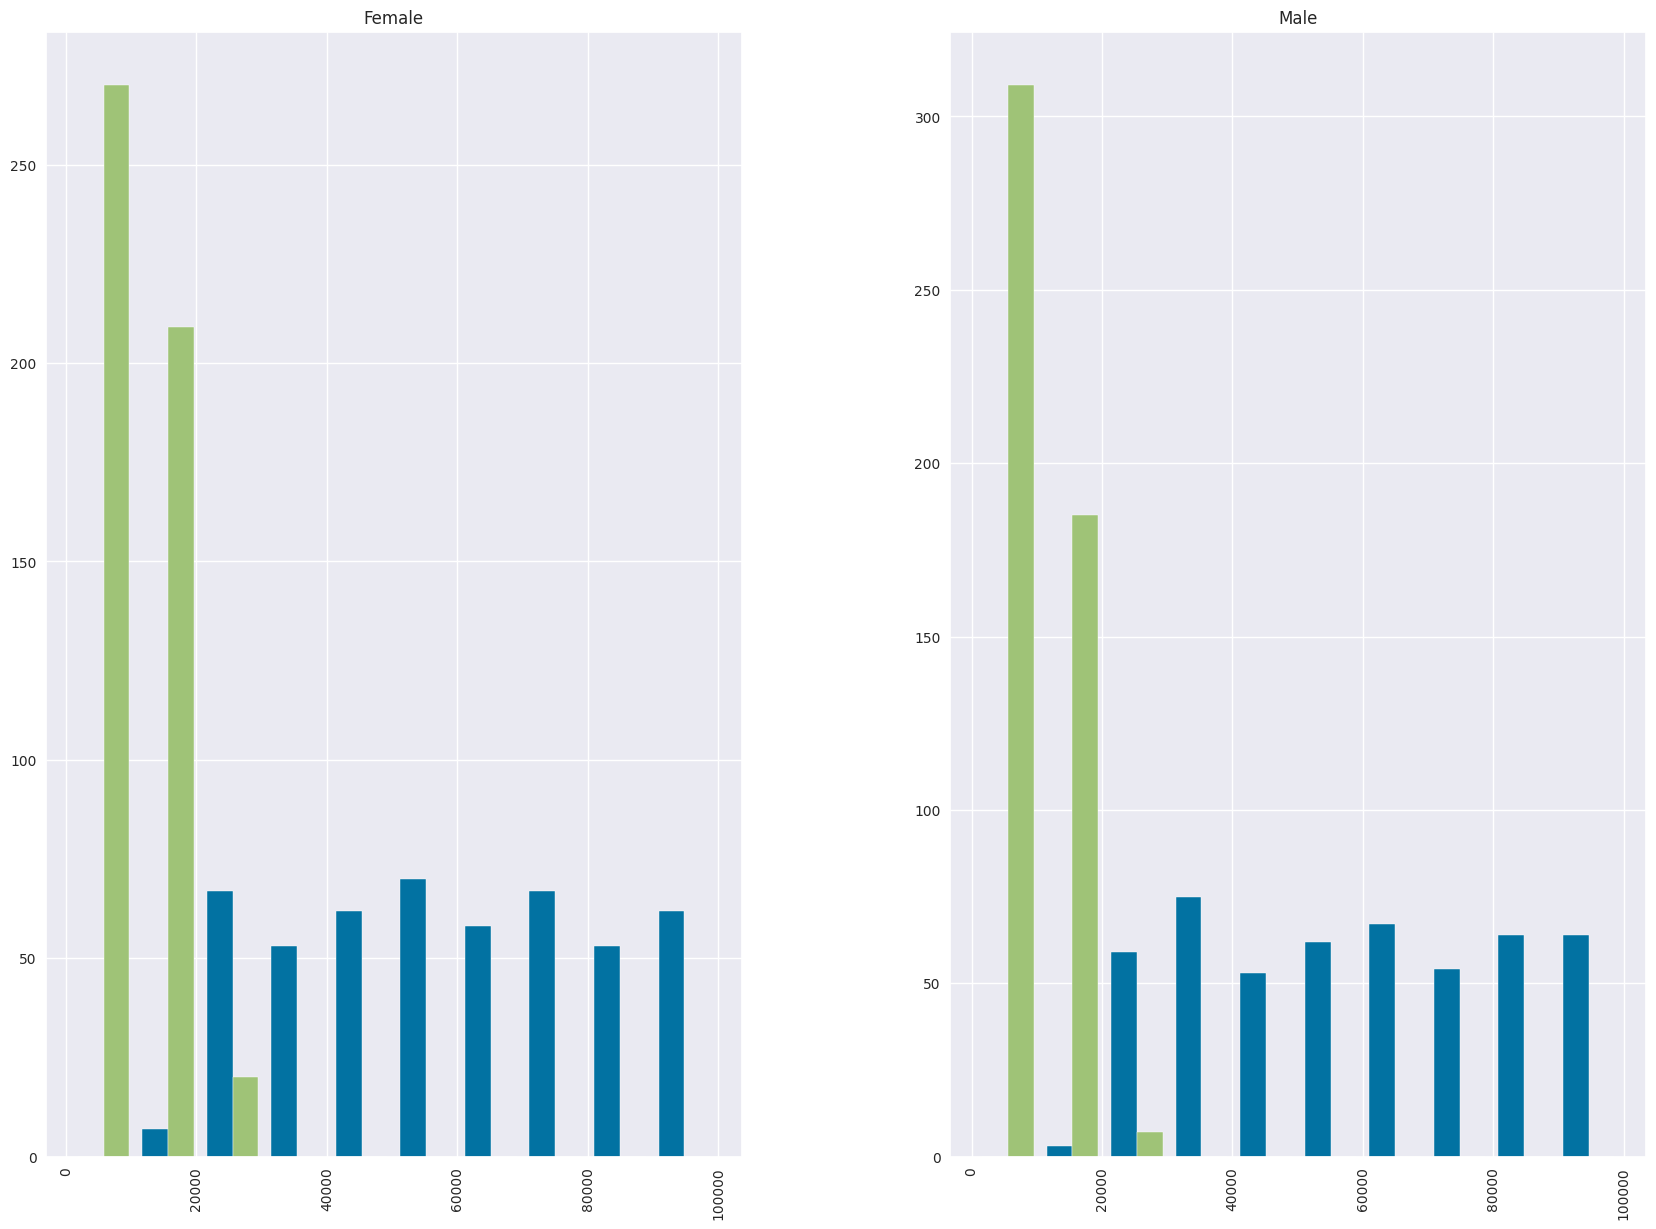

In [ ]:
tablaclientes.hist(column=["Salario", "Consumo"],by="Genero", figsize=(20,15))
plt.show()

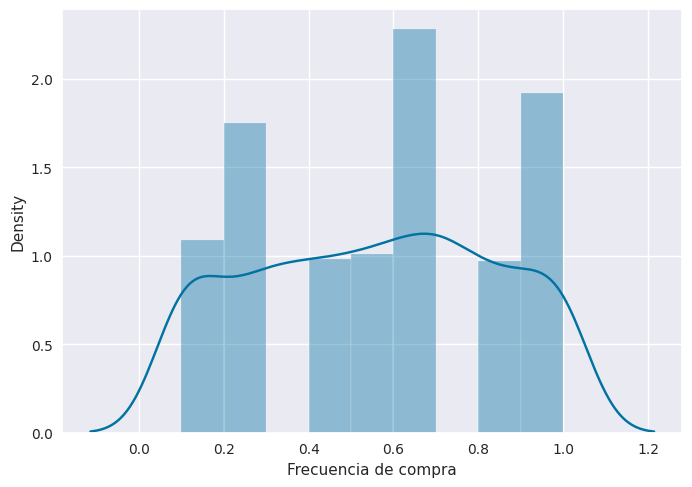

In [ ]:
sns.distplot(tablaclientes['Frecuencia de compra'], kde=True)
plt.show()

In [ ]:
fig = px.box(tablaclientes, x="Edad", y="Consumo", points="all")
fig.show()

**Medidas de tendencia central**

In [ ]:
scipy.stats.gmean(tablaclientes['Consumo'])

7693.189054357546

In [ ]:
scipy.stats.variation(tablaclientes['Consumo'])

0.5702480912435205

In [ ]:
scipy.stats.iqr(tablaclientes['Consumo'])

8625.0825

In [ ]:
scipy.stats.sem(tablaclientes['Consumo'])

173.44167083546432

**Medidas de asimetría**

In [ ]:
scipy.stats.skew(tablaclientes['Consumo']) # Coeficiente positivo, por lo que los valores de más altos deconsumo se encuentran más cercanos a la mediana del mismo

0.3346141352072415

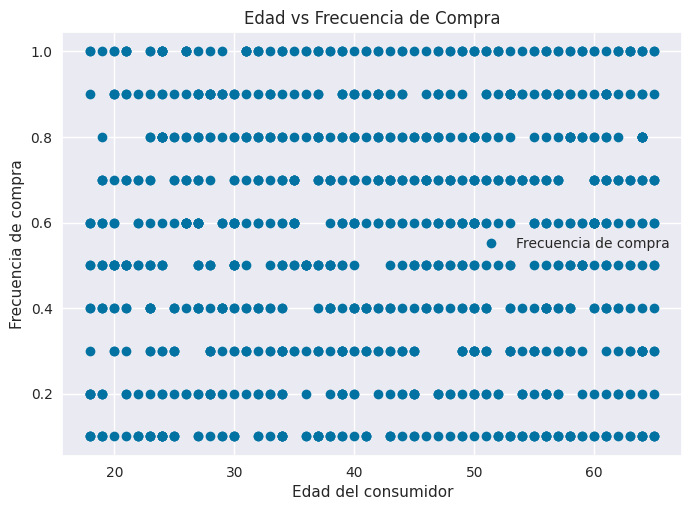

In [ ]:
tablaclientes.plot(x='Edad', y='Frecuencia de compra', style="o")
plt.title('Edad vs Frecuencia de Compra')
plt.xlabel('Edad del consumidor')
plt.ylabel('Frecuencia de compra')
plt.show()

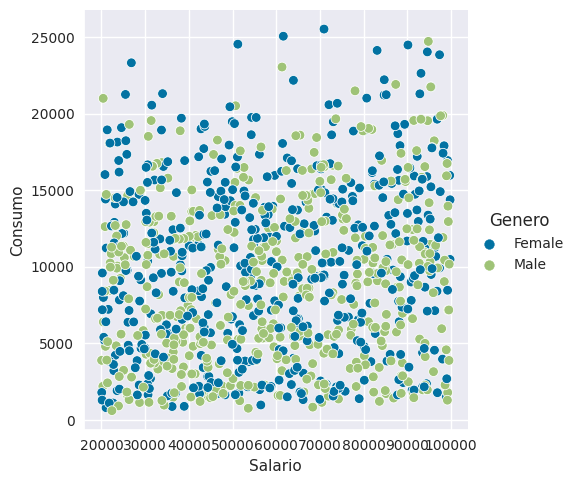

In [ ]:
 sns.relplot(x="Salario",y="Consumo",data=tablaclientes,kind="scatter",hue="Genero");

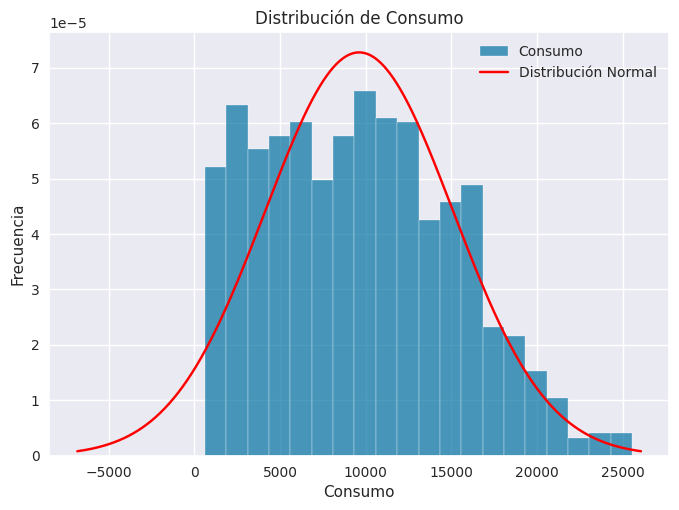

In [ ]:

import scipy.stats as stats
consumo = tablaclientes['Consumo']

mean = np.mean(consumo)
std = np.std(consumo)
x = np.linspace(mean - 3*std, mean + 3*std, 1000)
y = stats.norm.pdf(x,mean,std)
plt.hist(consumo, bins=20, density=True, alpha=0.7, label='Consumo')
plt.plot(x, y, color='red', label='Distribución Normal')

plt.xlabel('Consumo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Consumo')
plt.legend()
plt.show()

In [ ]:
# nueva tabla
df=tablaclientes
df.head()

,Nombre,Edad,Genero,Educación,Salario,País,Frecuencia de compra,Consumo
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [ ]:
#Se eliminaron las columnas que no representaban importancia para el PCA
columnas_a_eliminar = ['Nombre', 'Genero','País']
df = df.drop(columnas_a_eliminar, axis=1)

In [ ]:
data=pd.get_dummies(df,columns=['Educación'])
df.head()

,Edad,Educación,Salario,Frecuencia de compra,Consumo
0,42,High School,53936,0.9,13227.120
1,49,Master,82468,0.6,12674.040
2,55,Bachelor,56941,0.3,5354.115
3,24,Bachelor,60651,0.2,2606.510
4,64,Master,81884,0.9,18984.780


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [ ]:
data1=pd.DataFrame(enc.fit_transform(tablaclientes[['Educación']]).toarray())
data1.head()

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [ ]:
# Convertir a z score:
datos_z=pd.DataFrame()
for j in data1.columns[0:]:
  datos_z[j] = (data1[j] - data1[j].mean()) / data1[j].std()

datos_z

,0,1,2,3
0,-0.609402,1.754580,-0.555510,-0.573984
1,-0.609402,-0.569367,1.798347,-0.573984
2,1.639313,-0.569367,-0.555510,-0.573984
3,1.639313,-0.569367,-0.555510,-0.573984
4,-0.609402,-0.569367,1.798347,-0.573984
...,...,...,...,...
995,-0.609402,-0.569367,-0.555510,1.740467
996,-0.609402,1.754580,-0.555510,-0.573984
997,-0.609402,-0.569367,1.798347,-0.573984
998,-0.609402,-0.569367,1.798347,-0.573984


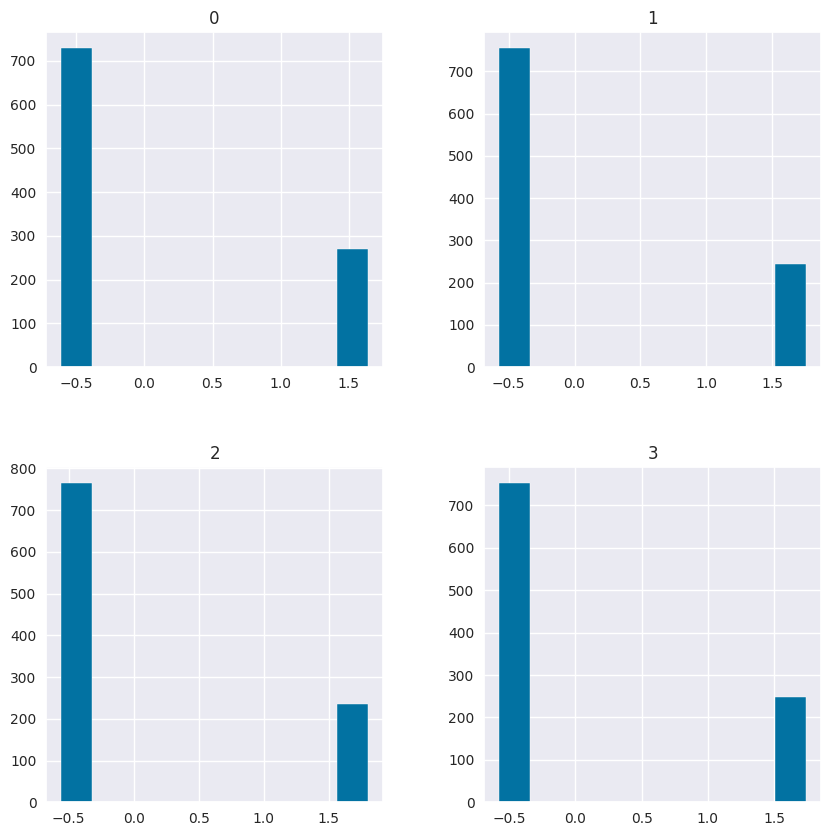

In [ ]:
# Histograma de los z score
datos_z.hist(figsize =(10, 10));

In [ ]:
columnas_a_eliminar = ['Educación']
df = df.drop(columnas_a_eliminar, axis=1)
df.head()

,Edad,Salario,Frecuencia de compra,Consumo
0,42,53936,0.9,13227.120
1,49,82468,0.6,12674.040
2,55,56941,0.3,5354.115
3,24,60651,0.2,2606.510
4,64,81884,0.9,18984.780


In [ ]:
#Preparamos nuestros datos para el PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
stz = sc.fit_transform(df)

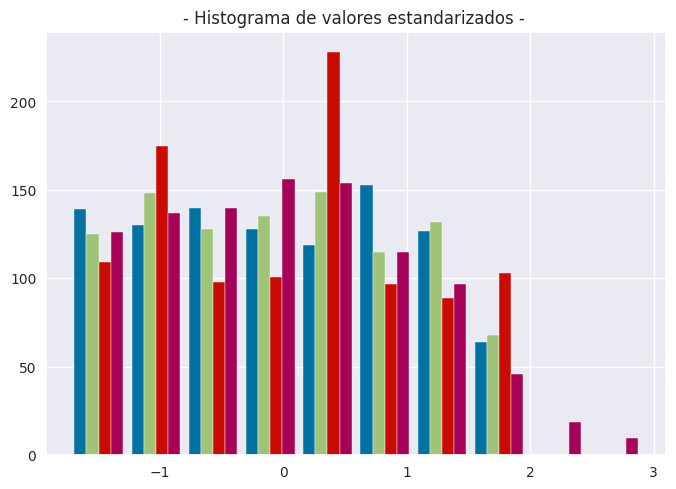

In [ ]:

plt.hist(x=stz, rwidth=0.85)
plt.title('- Histograma de valores estandarizados - ')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(stz)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.48520819, 0.26192438, 0.23446463, 0.01840281])

Insights:

El primer componente principal es responsable de la varianza del 48.52%. De manera similar, el segundo componente principal causa una variación del 26,19% en el conjunto de datos y un 23,44% En conjunto, podemos decir que (48.52%+ 26,19% + 23,44%) el 98,15% por ciento de la información de clasificación contenida en el conjunto de características es capturada por los tres componentes principales.

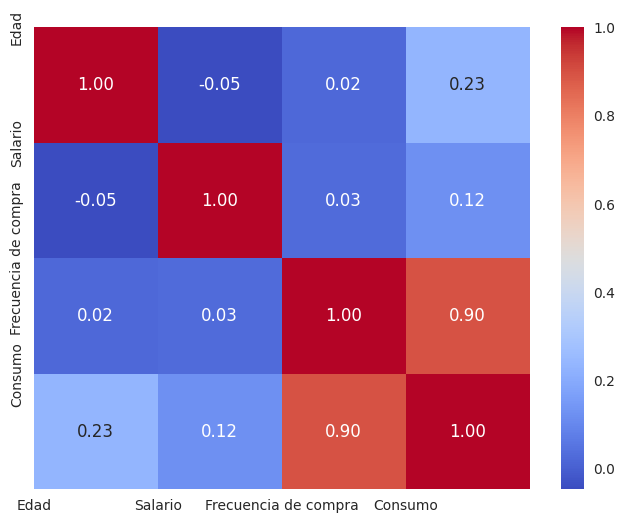

In [ ]:
corr = tablaclientes.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

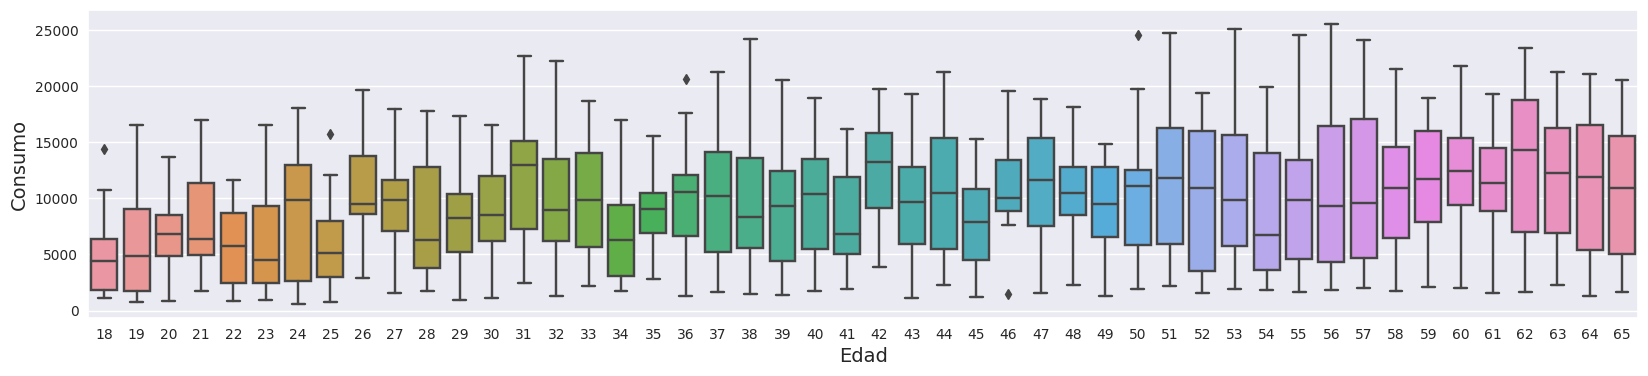

In [ ]:
f, axe = plt.subplots(1,1,figsize=(20,4))
sns.boxplot(x = 'Edad', y = 'Consumo', data = tablaclientes, ax = axe)
axe.set_xlabel('Edad', fontsize=14)
axe.set_ylabel('Consumo', fontsize=14)
plt.show()

In [ ]:
#Datos dummies y renombro la tabla
df = pd.get_dummies(tablaclientes)
df.head()

,Edad,Salario,Frecuencia de compra,Consumo,Nombre_Aaron Hughes,Nombre_Aaron Martin,Nombre_Abigail Hood,Nombre_Abigail Shaw,Nombre_Adam Frazier,Nombre_Adam Murray,...,País_Uruguay,País_Uzbekistan,País_Vanuatu,País_Venezuela,País_Vietnam,País_Wallis and Futuna,País_Western Sahara,País_Yemen,País_Zambia,País_Zimbabwe
0,42,53936,0.9,13227.120,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,82468,0.6,12674.040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,55,56941,0.3,5354.115,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,60651,0.2,2606.510,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,64,81884,0.9,18984.780,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Separo el dataset:
X = df.drop('Consumo', axis = 1)
y = df['Consumo']

In [ ]:
# Separo el dataset en train y test:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state= 42) # 80% training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()

In [ ]:
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Coeficientes:', regressor_linear.coef_)

Coeficientes: [ 8.53783346e+01  2.55200078e-02  1.71189373e+04 ...  4.96803863e+02
  6.75493429e+02 -1.16905445e+02]


In [ ]:
print('Coeficiente b0:', regressor_linear.intercept_)

Coeficiente b0: -4932.708524115318


In [ ]:
pd.DataFrame(regressor_linear.coef_, X.columns, columns=['coefficient'])

,coefficient
Edad,8.537833e+01
Salario,2.552001e-02
Frecuencia de compra,1.711894e+04
Nombre_Aaron Hughes,1.349559e+03
Nombre_Aaron Martin,6.821210e-12
...,...
País_Wallis and Futuna,-2.144058e+02
País_Western Sahara,3.140929e+02
País_Yemen,4.968039e+02
País_Zambia,6.754934e+02


In [ ]:
y_pred = regressor_linear.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Error cuadrático medio, RMSE, MAE, R^2


In [ ]:
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % (mean_squared_error(y_test, y_pred,squared=False)))
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('R_2: %.2f' % r2_score(y_test, y_pred))

Error cuadrático medio: 1794251.34
RMSE: 1339.50
MAE: 1026.87
R_2: 0.94


En mi opinion los valores son buenos y no es necesario aplicar Ridge  regression de Sklearn


In [ ]:
# Generamos un df con los valores reales y los predichos:
df_pred= pd.DataFrame({'Real':y_test, 'Predichos':y_pred})
df_pred

,Real,Predichos
521,10765.200,11082.468335
737,6264.510,7111.997683
740,5771.985,5215.221590
660,13975.220,13186.738501
411,1924.700,3120.783216
...,...,...
408,9104.150,10392.631314
332,19568.800,18483.432474
208,1258.245,-1072.194066
613,18882.600,18542.984699


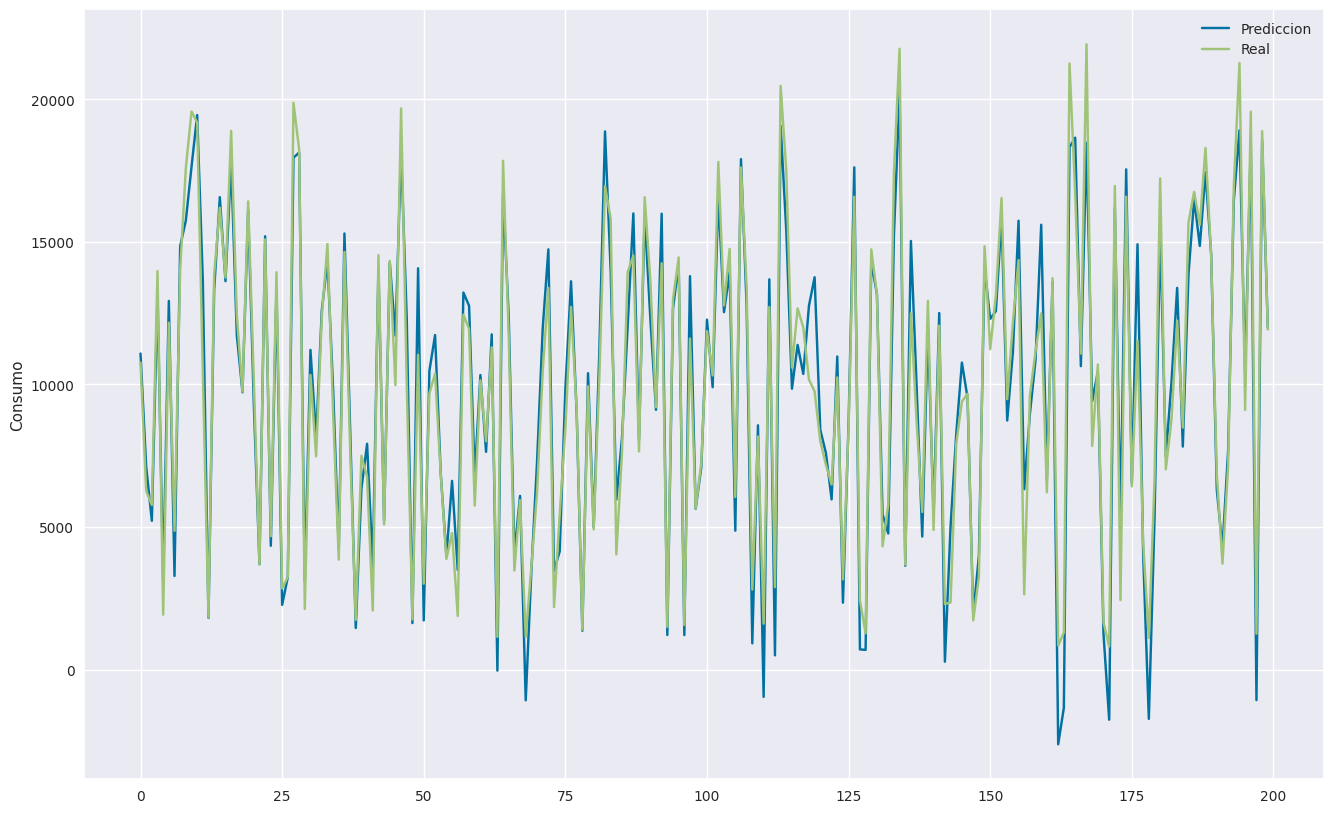

In [ ]:
# Graficamos:
plt.figure(figsize = (16,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Consumo')
plt.legend()
plt.show()

Decision Tree


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
df=tablaclientes
df.drop("País", axis=1, inplace=True)
df.drop("Nombre", axis=1, inplace=True)

In [ ]:
dic = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
dic1 = {'Female': 1, 'Male': 2}
df['Genero'] = df['Genero'].map(dic1)
df['Target'] = df['Educación'].map(dic)
df

,Edad,Genero,Educación,Salario,Frecuencia de compra,Consumo,Target
0,42,1,High School,53936,0.9,13227.120,1
1,49,1,Master,82468,0.6,12674.040,3
2,55,2,Bachelor,56941,0.3,5354.115,2
3,24,1,Bachelor,60651,0.2,2606.510,2
4,64,2,Master,81884,0.9,18984.780,3
...,...,...,...,...,...,...,...
995,42,1,PhD,98170,0.7,17435.950,4
996,39,2,High School,59174,0.9,11662.830,1
997,50,2,Master,59808,0.4,7196.160,3
998,50,1,Master,58272,0.7,13939.520,3


In [ ]:
data=df

In [ ]:
X = df.drop(["Educación","Target"], axis=1)
y = df["Educación"]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_test_pred)

0.53

In [ ]:
# Classification Report:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Bachelor       0.41      0.48      0.44        81
 High School       0.72      0.62      0.67        74
      Master       0.39      0.39      0.39        71
         PhD       0.67      0.62      0.64        74

    accuracy                           0.53       300
   macro avg       0.55      0.53      0.54       300
weighted avg       0.54      0.53      0.54       300



In [ ]:
print("Feature Selecction:")

for i, feature in enumerate(range(X.shape[1])):
  print(f"feature {feature}: {clf.feature_importances_[i]: .2f}")

Feature Selecction:
feature 0:  0.23
feature 1:  0.06
feature 2:  0.17
feature 3:  0.15
feature 4:  0.39


In [ ]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat

array([[39, 14, 21,  7],
       [25, 46,  3,  0],
       [23,  4, 28, 16],
       [ 9,  0, 19, 46]])

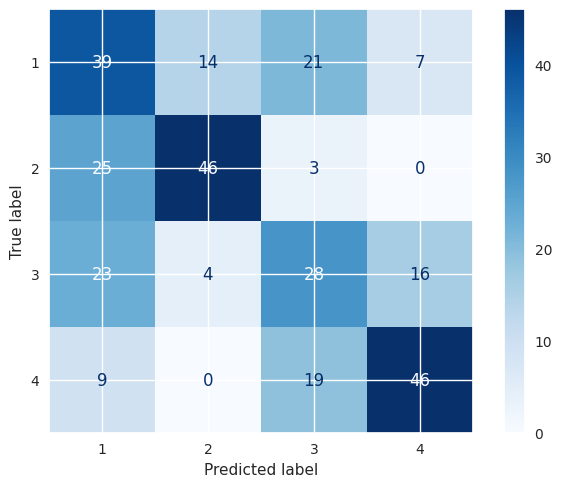

In [ ]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[1,2,3,4])
disp.plot(cmap=plt.cm.Blues)

In [ ]:
 # Labels para mostrar el arbol:
x_names = ['Edad', 'Salario','Genero', 'Frecuencia de compra', 'Consumo']
y_names = ["High School", "Master","Bachelor","PhD"]

[Text(0.7733195444171348, 0.9736842105263158, 'Consumo <= 16759.337\ngini = 0.749\nsamples = 700\nvalue = [190, 171, 165, 174]\nclass = High School'),
 Text(0.607032347261236, 0.9210526315789473, 'Frecuencia de compra <= 0.75\ngini = 0.747\nsamples = 629\nvalue = [177, 171, 143, 138]\nclass = High School'),
 Text(0.45282873946629215, 0.868421052631579, 'Consumo <= 10499.643\ngini = 0.75\nsamples = 496\nvalue = [129, 118, 121, 128]\nclass = High School'),
 Text(0.3074599133895131, 0.8157894736842105, 'Frecuencia de compra <= 0.55\ngini = 0.745\nsamples = 388\nvalue = [107, 113, 88, 80]\nclass = Master'),
 Text(0.10368387172284645, 0.7631578947368421, 'Consumo <= 1653.243\ngini = 0.75\nsamples = 325\nvalue = [86, 80, 80, 79]\nclass = High School'),
 Text(0.027153558052434457, 0.7105263157894737, 'Consumo <= 1111.112\ngini = 0.507\nsamples = 34\nvalue = [9, 22, 2, 1]\nclass = Master'),
 Text(0.023408239700374533, 0.6578947368421053, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0]\nclass = 

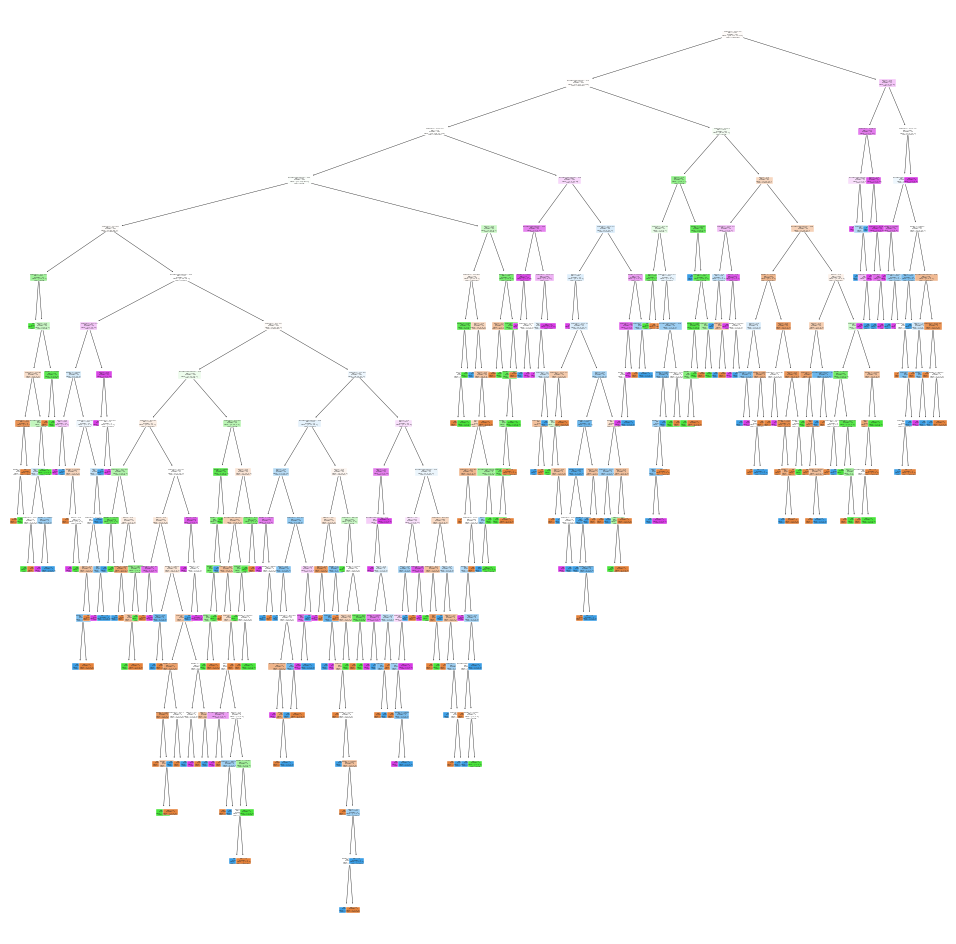

In [ ]:
from sklearn import tree

fig, ax= plt.subplots(figsize=(12,12))
tree.plot_tree(clf,filled=True, feature_names=x_names, class_names= y_names)

Random Forest


In [ ]:
#Creamos un random forest
model2 = RandomForestClassifier(random_state=42, n_estimators=200,
                               class_weight="balanced", max_features="log2")

In [ ]:
model2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=42)

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.59

In [ ]:
# Classification Report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Bachelor       0.47      0.60      0.53        81
 High School       0.81      0.62      0.70        74
      Master       0.41      0.39      0.40        71
         PhD       0.76      0.73      0.74        74

    accuracy                           0.59       300
   macro avg       0.61      0.59      0.59       300
weighted avg       0.61      0.59      0.60       300



In [ ]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[49,  8, 22,  2],
       [22, 46,  6,  0],
       [26,  2, 28, 15],
       [ 7,  1, 12, 54]])

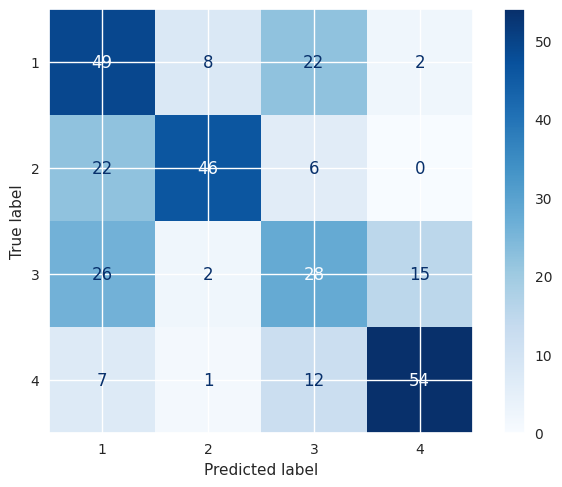

In [ ]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[1,2,3,4])
disp.plot(cmap=plt.cm.Blues)

In [ ]:
print("Feature Selecction:")

for i, feature in enumerate(range(X.shape[1])):
  print(f"feature {feature}: {model2.feature_importances_[i]: .2f}")

Feature Selecction:
feature 0:  0.22
feature 1:  0.04
feature 2:  0.23
feature 3:  0.15
feature 4:  0.36


Regresión Logística

In [ ]:
# Creamos un modelo de LR
model_lr = LogisticRegression(solver="newton-cg",max_iter=250)

In [ ]:
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=250, solver='newton-cg')

In [ ]:
y_pred = model_lr.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.62

In [ ]:
# Classification Report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Bachelor       0.58      0.65      0.62        81
 High School       0.64      0.76      0.69        74
      Master       0.71      0.14      0.24        71
         PhD       0.63      0.91      0.74        74

    accuracy                           0.62       300
   macro avg       0.64      0.61      0.57       300
weighted avg       0.64      0.62      0.58       300



In [ ]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[53, 22,  1,  5],
       [17, 56,  0,  1],
       [21,  6, 10, 34],
       [ 0,  4,  3, 67]])

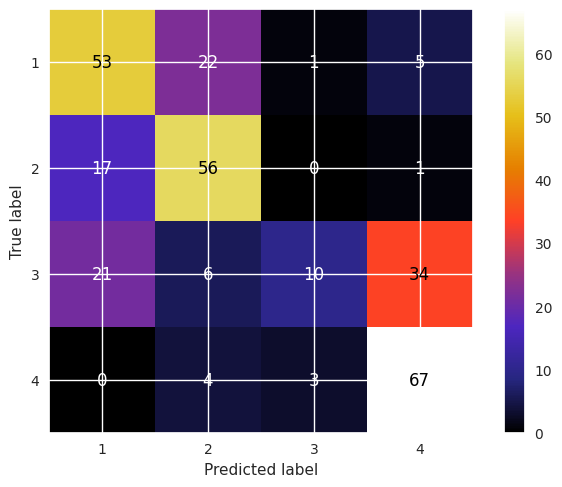

In [ ]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[1,2,3,4])
disp.plot(cmap=plt.cm.CMRmap)

Clases desbalanceadas


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 0.01786273, -1.002002  , -0.22978925,  1.21392036,  0.6592205 ],
       [ 0.52615178, -1.002002  ,  0.99756538,  0.15955988,  0.55832966],
       [ 0.96182812,  0.998002  , -0.10052384, -0.89480059, -0.77694449],
       ...,
       [ 0.59876451,  0.998002  ,  0.02280526, -0.5433471 , -0.44092533],
       [ 0.59876451, -1.002002  , -0.04326851,  0.51101338,  0.78917392],
       [-0.27258816, -1.002002  , -1.15138063, -0.19189361, -0.23723191]])

In [ ]:
X=X_scaled

In [ ]:
X.shape

(1000, 5)

In [ ]:
X = pd.DataFrame(X, columns=['Edad','Genero' ,'Salario', 'Frecuencia de compra', 'Consumo'])
X.head()

,Edad,Genero,Salario,Frecuencia de compra,Consumo
0,0.017863,-1.002002,-0.229789,1.213920,0.659221
1,0.526152,-1.002002,0.997565,0.159560,0.558330
2,0.961828,0.998002,-0.100524,-0.894801,-0.776944
3,-1.289166,-1.002002,0.059068,-1.246254,-1.278153
4,1.615343,0.998002,0.972444,1.213920,1.709512


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=25)

In [ ]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25)

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
# Classification Report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Bachelor       0.46      0.47      0.46        75
 High School       0.73      0.65      0.69        69
      Master       0.37      0.41      0.39        54
         PhD       0.68      0.69      0.69        52

    accuracy                           0.55       250
   macro avg       0.56      0.55      0.56       250
weighted avg       0.56      0.55      0.56       250



In [ ]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[35, 14, 21,  5],
       [20, 45,  3,  1],
       [18,  3, 22, 11],
       [ 3,  0, 13, 36]])

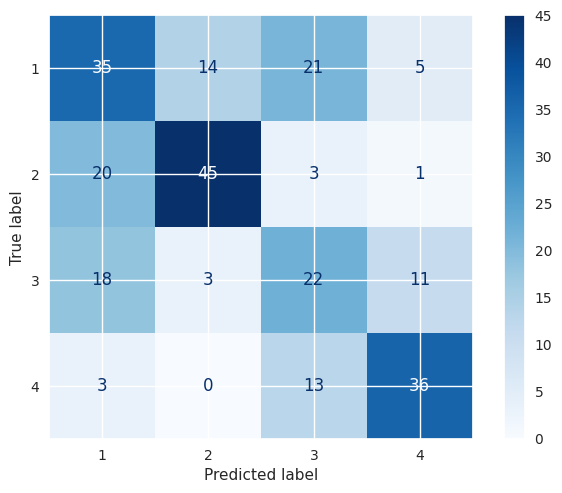

In [ ]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[1,2,3,4])
disp.plot(cmap=plt.cm.Blues)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
y_res.value_counts()

Bachelor       196
High School    196
PhD            196
Master         196
Name: Educación, dtype: int64

In [ ]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42, stratify=y_res)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=35)

In [ ]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=35)

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
# Classification Report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Bachelor       0.35      0.37      0.36        49
 High School       0.68      0.65      0.67        49
      Master       0.38      0.45      0.41        49
         PhD       0.82      0.67      0.74        49

    accuracy                           0.54       196
   macro avg       0.56      0.54      0.54       196
weighted avg       0.56      0.54      0.54       196



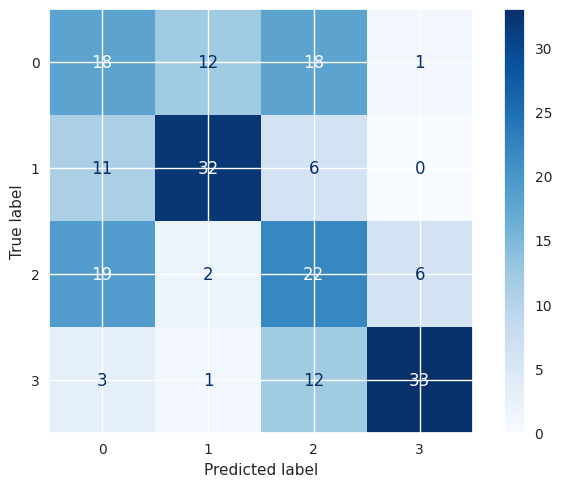

In [ ]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_pred)

# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[0,1,2,3])
disp.plot(cmap=plt.cm.Blues)

Aplique Clases desbalanceadas pero los accuracy dados tanto en la Regresión logística y RandomForest fueron mejores


K-Means


In [ ]:
df1=tablaclientes
df1 = df1.drop(['Educación'],axis=1)
df1.rename(columns={'Target': 'Educación'}, inplace=True)
df1.head()

,Edad,Genero,Salario,Frecuencia de compra,Consumo,Educación,cluster
0,42,1,53936,0.9,13227.120,1,2
1,49,1,82468,0.6,12674.040,3,0
2,55,2,56941,0.3,5354.115,2,2
3,24,1,60651,0.2,2606.510,2,4
4,64,2,81884,0.9,18984.780,3,0


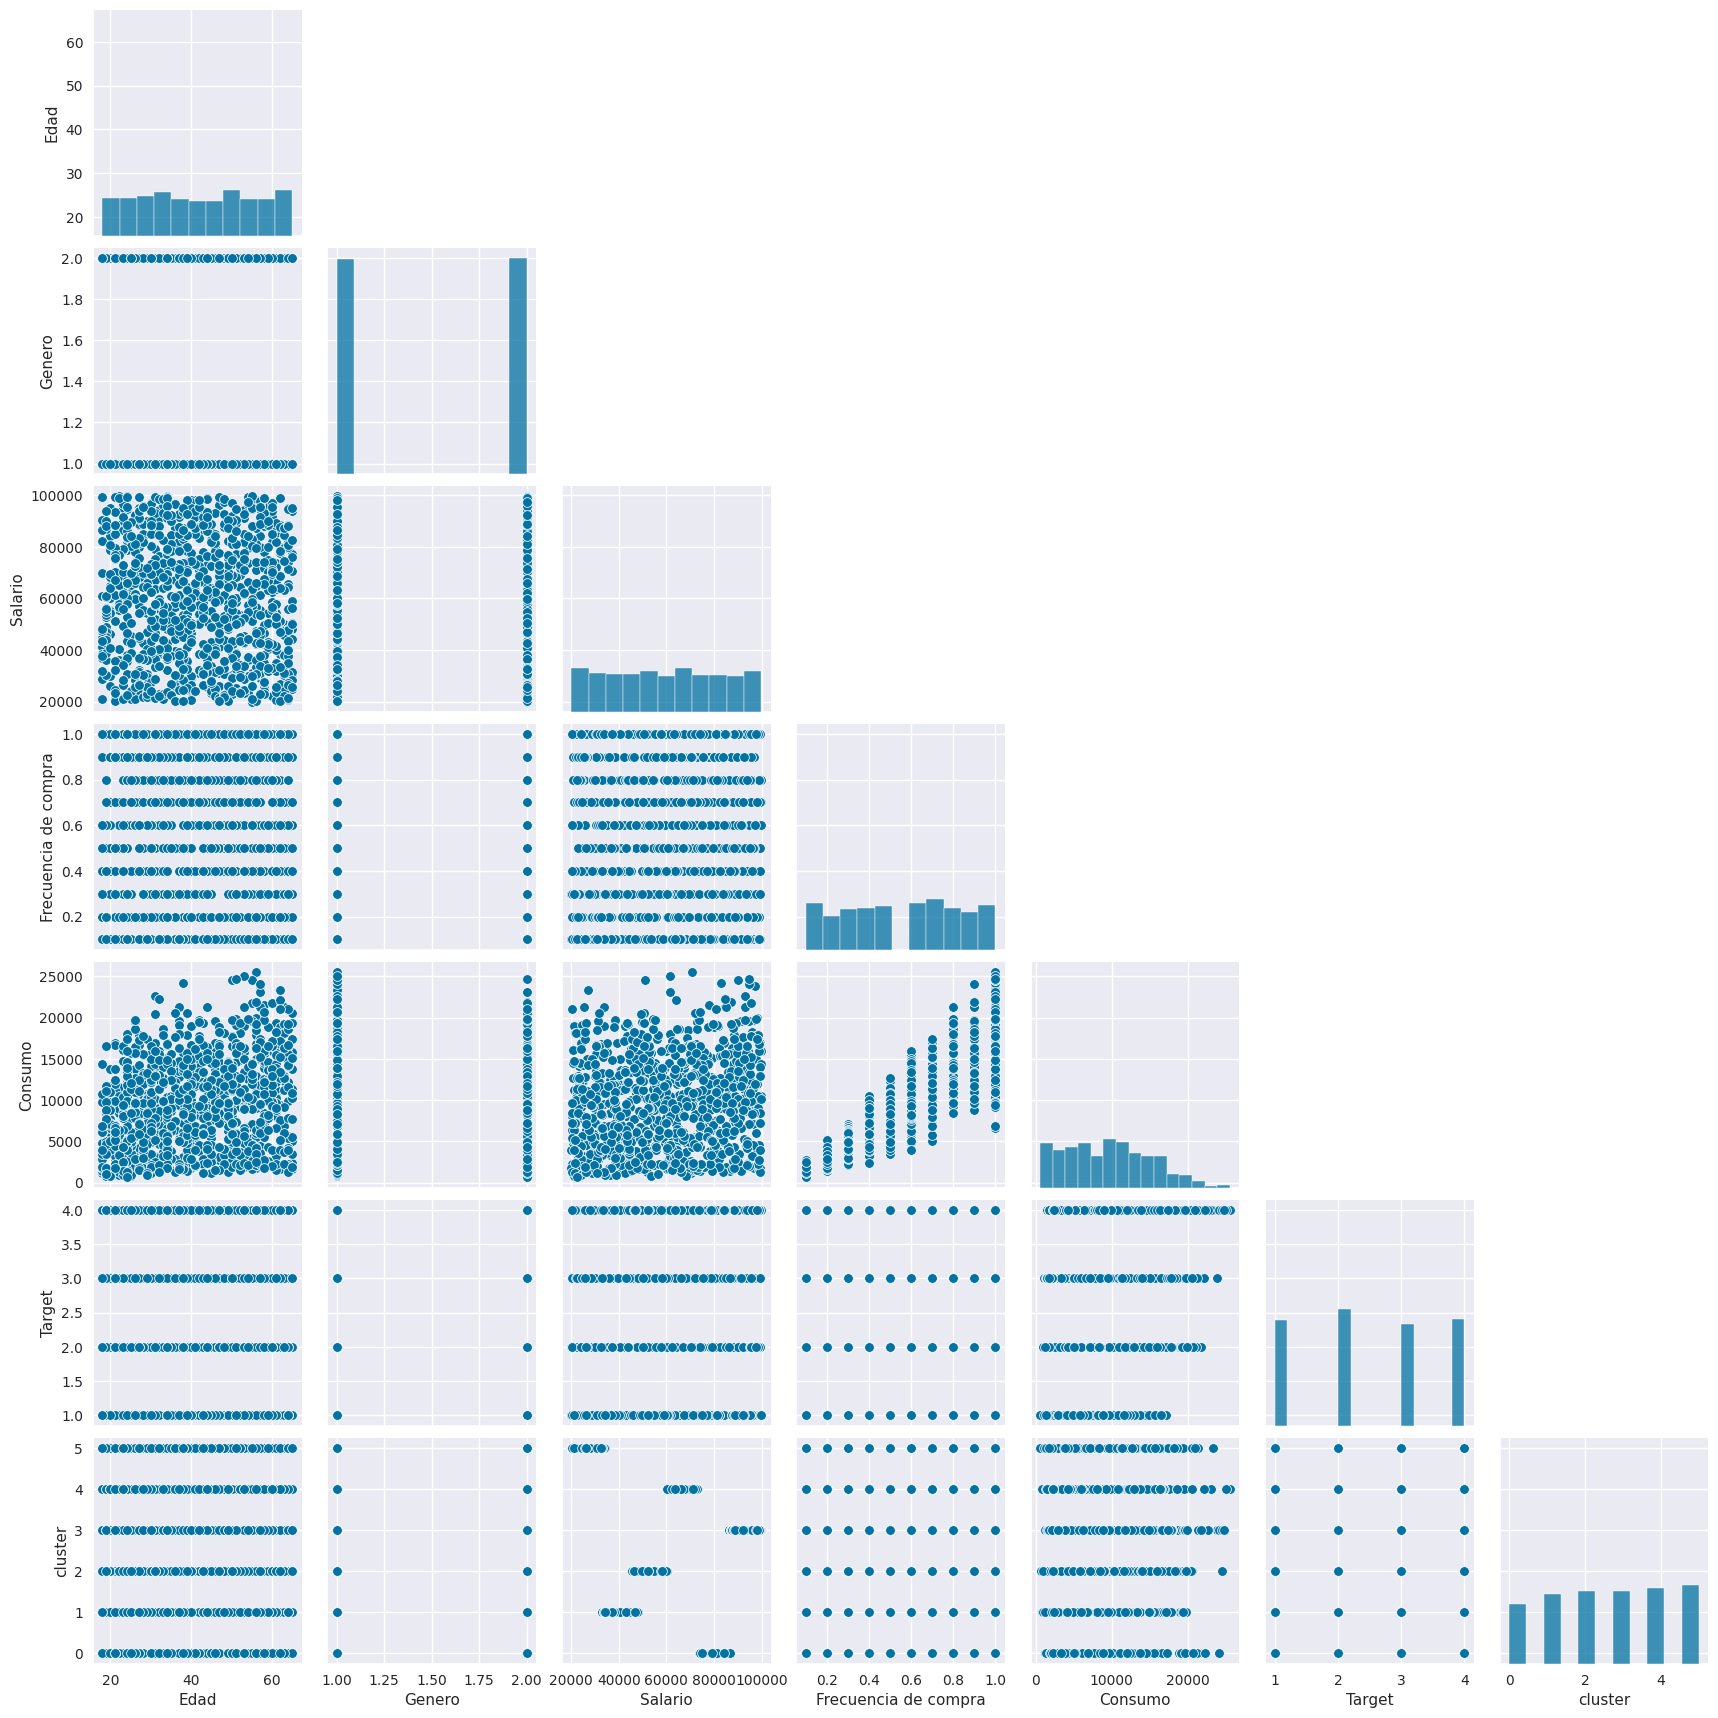

In [ ]:
sns.set_style("darkgrid")

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

pairplot = sns.pairplot(data)
pairplot.map_upper(hide_current_axis)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_estandarizado = scaler.fit_transform(df1)

In [ ]:
from sklearn.cluster import KMeans

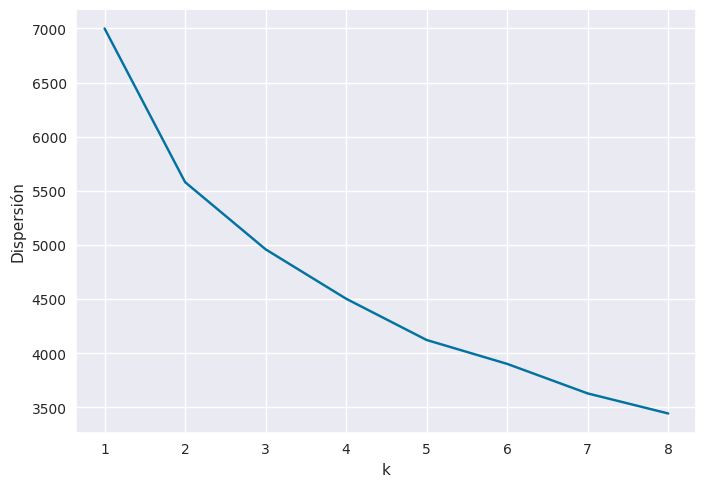

In [ ]:
inertia = []

for k in range(1, 9):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(df_estandarizado)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 9), inertia, 'bx-')
plt.xlabel('k')
plt.ylabel(u'Dispersión')
plt.show()

Segun metodo del codo me quedo con 4 clusters

In [ ]:
km = KMeans(n_clusters=4,
            init='k-means++',
            max_iter=300,
            tol=1e-04,
            random_state=42)

clusters_pred = km.fit_predict(df_estandarizado)

cluster_labels = np.unique(clusters_pred)
n_clusters = cluster_labels.shape[0]

In [ ]:
cluster_labels

array([0, 1, 2, 3], dtype=int32)

In [ ]:
n_clusters

4

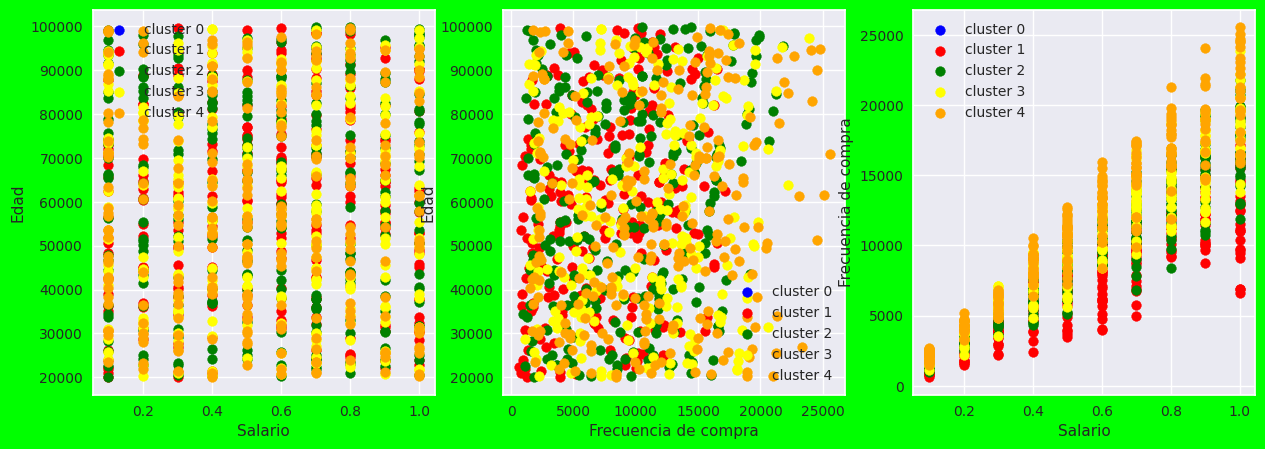

In [ ]:
df1 ['cluster'] = clusters_pred
df1_np = df1.to_numpy()

fig, axes = plt.subplots(1,3, figsize=(15,5),facecolor='lime')


for cluster, color in enumerate(['blue', 'red', 'green', 'yellow', 'orange']):

    #Salario vs Edad
    axes[0].scatter(x=df1_np[df1_np[:,5] == cluster, 3],
                    y=df1_np[df1_np[:,5] == cluster, 2],
                    c=color,
                    label='cluster {}'.format(cluster))
    axes[0].legend()
    axes[0].set_xlabel('Salario')
    axes[0].set_ylabel('Edad')

    #Frecuencia de compras vs Edad
    axes[1].scatter(x=df1_np[df1_np[:,5] == cluster, 4],
                    y=df1_np[df1_np[:,5] == cluster, 2],
                    c=color,
                    label='cluster {}'.format(cluster))
    axes[1].legend()
    axes[1].set_xlabel('Frecuencia de compra')
    axes[1].set_ylabel('Edad')

    #Salario vs Frecuencia de compra
    axes[2].scatter(x=df1_np[df1_np[:,5] == cluster, 3],
                    y=df1_np[df1_np[:,5] == cluster, 4],
                    c=color,
                    label='cluster {}'.format(cluster))
    axes[2].legend()
    axes[2].set_xlabel('Salario')
    axes[2].set_ylabel('Frecuencia de compra')


plt.show()

In [ ]:
df1['cluster'] = df1['cluster'].replace({0: 'cluster 0', 1:'cluster 1', 2:'cluster 2',3:'cluster 3'})
df1

,Edad,Genero,Salario,Frecuencia de compra,Consumo,Educación,cluster
0,42,1,53936,0.9,13227.120,1,cluster 3
1,49,1,82468,0.6,12674.040,3,cluster 3
2,55,2,56941,0.3,5354.115,2,cluster 2
3,24,1,60651,0.2,2606.510,2,cluster 2
4,64,2,81884,0.9,18984.780,3,cluster 0
...,...,...,...,...,...,...,...
995,42,1,98170,0.7,17435.950,4,cluster 3
996,39,2,59174,0.9,11662.830,1,cluster 0
997,50,2,59808,0.4,7196.160,3,cluster 2
998,50,1,58272,0.7,13939.520,3,cluster 3


In [ ]:
df1.groupby(['cluster']).median()

,Edad,Genero,Salario,Frecuencia de compra,Consumo,Educación
cluster,,,,,,
cluster 0,43.5,2.0,69034.5,0.7,11886.4000,2.0
cluster 1,47.0,1.0,26062.0,0.7,10062.9000,3.0
cluster 2,37.0,2.0,60588.0,0.3,4112.9250,2.0
cluster 3,43.0,1.0,69226.5,0.7,13725.3375,3.0


Se puede observar que el cluster 2 tiene la menor mediana referida a edad, que cluster 0,1 y 3 comparten la misma mediana de frecuencia de compra, que el cluster 3 es aquel que posee la mediana de consumo mas alta.

DBSCAN

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
from sklearn.cluster import DBSCAN

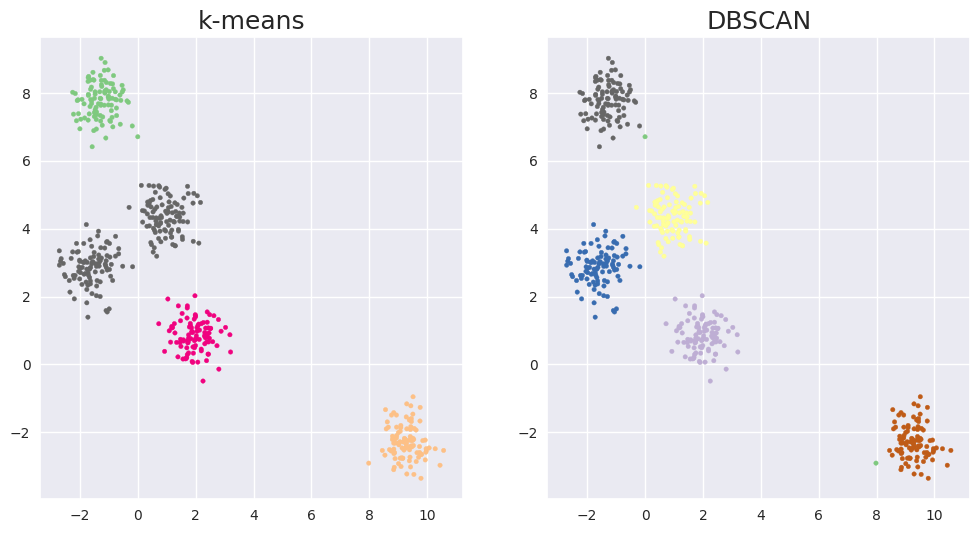

In [ ]:
km = KMeans(n_clusters = 4,
            random_state = 42).fit_predict(blobs_7)

db = DBSCAN(eps = 0.6,
            min_samples = 5,
            metric = 'euclidean').fit_predict(blobs_7)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('k-means', size=18)
plt.scatter(blobs_7[:, 0], blobs_7[:, 1], s=10,  c = km, cmap = 'Accent')

plt.subplot(1, 2, 2)
plt.title('DBSCAN', size=18)
plt.scatter(blobs_7[:, 0], blobs_7[:, 1], s=10,  c = db, cmap = 'Accent')
plt.show()

Comparo el K-Means con el DBSCAN, se puede ver que ambos agruparon correctamente, aunque en el DBSCAN se pueden identificar los valores considerados como ruido

In [ ]:
from sklearn.datasets import make_moons

moons, moons_classes = make_moons(n_samples = 200,
                                  noise = 0.05,
                                  random_state = 42)

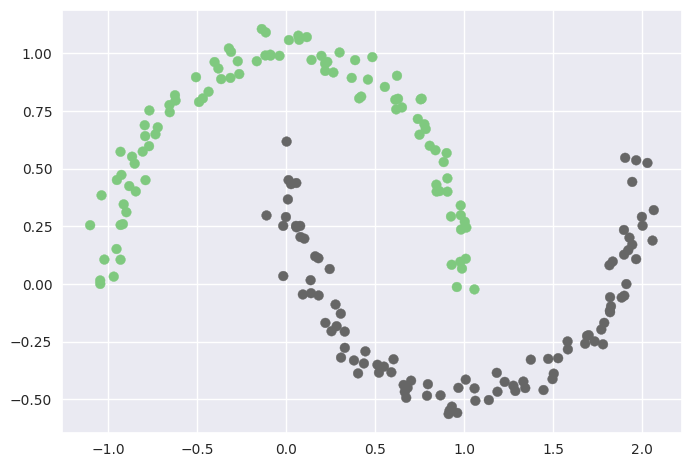

In [ ]:
# Graficamos el dataset:
plt.scatter(moons[:, 0], moons[:, 1], c = moons_classes, cmap = 'Accent')
plt.show()

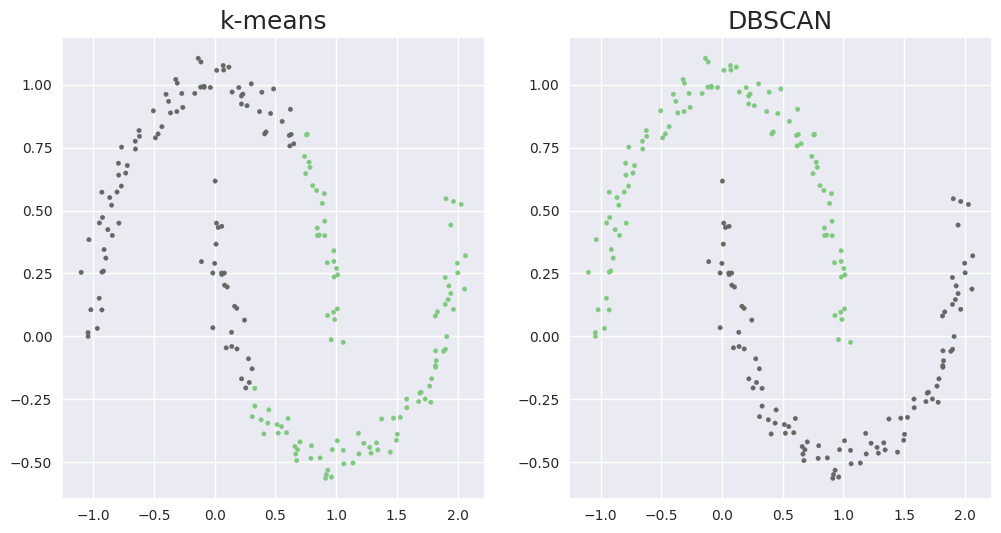

In [ ]:
km = KMeans(n_clusters = 2,
            random_state = 1).fit_predict(moons)

db = DBSCAN(eps = 0.2,
            min_samples = 5,
            metric = 'euclidean').fit_predict(moons)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('k-means', size = 18)
plt.scatter(moons[:, 0], moons[:, 1], s=10, c = km, cmap = 'Accent')

plt.subplot(1, 2, 2)
plt.title('DBSCAN', size = 18)
plt.scatter(moons[:, 0], moons[:, 1], s=10, c = db, cmap = 'Accent')
plt.show()

PYCARET


In [ ]:
from pycaret.utils import version
version()

'3.1.0'

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 9.8 MB/s

In [ ]:
!pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (30 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
data.head()

,Edad,Genero,Educación,Salario,Frecuencia de compra,Consumo,Target
0,42,1,High School,53936,0.9,13227.120,1
1,49,1,Master,82468,0.6,12674.040,3
2,55,2,Bachelor,56941,0.3,5354.115,2
3,24,1,Bachelor,60651,0.2,2606.510,2
4,64,2,Master,81884,0.9,18984.780,3


In [ ]:
data1= data

In [ ]:
y1 = data1['Consumo']
data1 = data1.drop(['Consumo','Target'],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

seed = 42
# usamos la rutina train_test_split de Sklearn para dividir los datos en
# training y test (la variable random_state se usa para que siempre obtengamos la
# misma particion aleatoria)
X_train_val, X_test, y_train_val, y_test = train_test_split(data1, y1, test_size=0.30, random_state=seed)

# ahora necesitamos partir X_train_val y y_train_val para sacarle el 10% que
# usaremos como validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=seed)

# imprimimos por pantalla los tamaños finales
print('=======================================================================================')
print('PARTICIÓN DATASET:')
print('')
print('Instancias de Entrenamiento:')
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print(' ')
print('Instancias de Prueba:')
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))
print(' ')
print('Instancias de Validación:')
print('X_val: {}'.format(X_val.shape))
print('y_val: {}'.format(y_val.shape))
print('=======================================================================================')

PARTICIÓN DATASET:

Instancias de Entrenamiento:
X_train: (630, 5)
y_train: (630,)
 
Instancias de Prueba:
X_test: (300, 5)
y_test: (300,)
 
Instancias de Validación:
X_val: (70, 5)
y_val: (70,)


In [ ]:
data1_xval = pd.DataFrame(X_val, columns=df.columns)
columnas_a_eliminar = ['Consumo', 'Target']
data1_xval.drop(columnas_a_eliminar, axis=1, inplace=True)
data1_xval.head()

,Edad,Genero,Educación,Salario,Frecuencia de compra
375,42,2,Master,50613,0.8
556,58,2,Master,65268,0.4
610,52,2,Master,32127,0.2
634,61,1,Bachelor,72308,0.7
157,30,2,PhD,80410,0.6


In [ ]:
data1_yval= pd.DataFrame(y_val)
data1_yval.head()

,Consumo
375,14024.52
556,8105.36
610,3721.27
634,14430.78
157,12012.30


In [ ]:
# Data Set para validar
data1_unseen = pd.concat([data1_xval,data1_yval],axis=1)
data1_unseen.head()

,Edad,Genero,Educación,Salario,Frecuencia de compra,Consumo
375,42,2,Master,50613,0.8,14024.52
556,58,2,Master,65268,0.4,8105.36
610,52,2,Master,32127,0.2,3721.27
634,61,1,Bachelor,72308,0.7,14430.78
157,30,2,PhD,80410,0.6,12012.30


In [ ]:
# Data Set para entrenar en Pycaret:
data_py = pd.concat([X_train,y_train], axis=1)
data_py.head()

,Edad,Genero,Educación,Salario,Frecuencia de compra,Consumo
364,18,1,High School,90376,0.3,3455.640
482,23,1,Bachelor,26384,0.4,4527.680
203,43,2,Master,58237,0.7,12538.295
145,54,2,High School,73844,0.9,14122.980
648,53,2,PhD,28918,0.7,15012.130


In [ ]:
from pycaret.regression import *

In [ ]:
reg = setup(data=data_py, target='Consumo')

,Description,Value
0,Session id,7333
1,Target,Consumo
2,Target type,Regression
3,Original data shape,"(630, 6)"
4,Transformed data shape,"(630, 9)"
5,Transformed train set shape,"(441, 9)"
6,Transformed test set shape,"(189, 9)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,227.1621,127441.5840,343.6562,0.9959,0.0745,0.0411,0.9360
gbr,Gradient Boosting Regressor,385.6400,279961.0516,519.9206,0.9907,0.0808,0.0531,0.2330
lightgbm,Light Gradient Boosting Machine,364.3754,313618.9285,550.9329,0.9898,0.0619,0.0447,0.2050
xgboost,Extreme Gradient Boosting,515.0407,561665.3297,727.0047,0.9815,0.0816,0.0616,0.2330
et,Extra Trees Regressor,612.7751,786863.1494,871.5041,0.9740,0.1019,0.0761,0.4110
rf,Random Forest Regressor,670.0623,893192.1564,933.2058,0.9702,0.1068,0.0817,0.5510
lr,Linear Regression,964.4555,1771998.0157,1319.7242,0.9421,0.3608,0.2183,1.2350
lasso,Lasso Regression,964.4704,1772002.7508,1319.6438,0.9421,0.3597,0.2180,0.1190
lar,Least Angle Regression,964.4555,1771998.0157,1319.7242,0.9421,0.3608,0.2183,0.2520
llar,Lasso Least Angle Regression,964.4700,1772002.2565,1319.6436,0.9421,0.3597,0.2180,0.2520


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
model_1 = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,209.4326,75770.8907,275.2651,0.9973,0.0891,0.0458
1,318.8640,278261.3313,527.5048,0.9907,0.0661,0.0413
2,174.5710,70773.8458,266.0335,0.9981,0.0928,0.0467
3,285.0298,178163.8287,422.0946,0.9953,0.0593,0.0417
4,231.3626,105371.2859,324.6094,0.9958,0.0933,0.0481
5,215.2732,93579.1376,305.9071,0.9967,0.0813,0.0433
6,169.5769,47328.0467,217.5501,0.9982,0.0349,0.0215
7,247.8699,207705.9816,455.7477,0.9936,0.0296,0.0213
8,259.9784,157350.0147,396.6737,0.9957,0.1293,0.0718


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(model_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

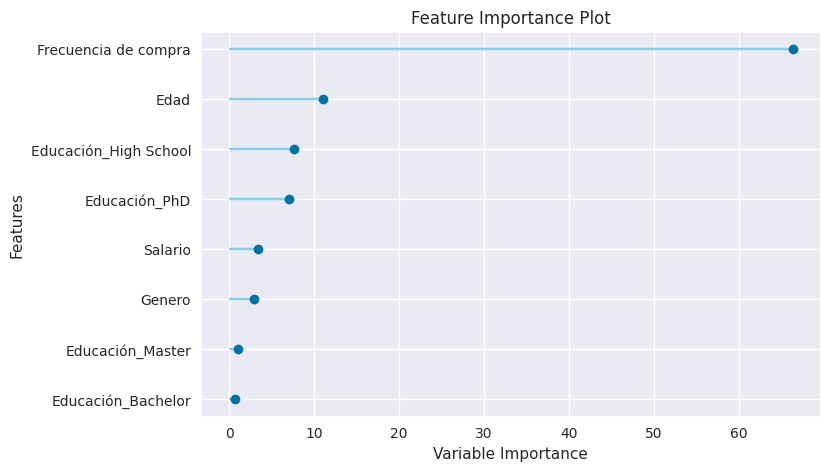

In [ ]:
plot_model(model_1,'feature')

In [ ]:
tune_model1 = tune_model(model_1)
print(tune_model1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,225.9095,85065.7882,291.6604,0.9969,0.0642,0.0398
1,317.2754,253064.5582,503.0552,0.9916,0.0700,0.0445
2,240.5959,111391.0025,333.7529,0.9970,0.0942,0.0535
3,335.2519,288368.0780,536.9991,0.9924,0.0927,0.0535
4,215.6831,79492.0291,281.9433,0.9968,0.0780,0.0406
5,246.5671,117482.3757,342.7570,0.9959,0.0733,0.0455
6,166.6807,43367.4242,208.2485,0.9983,0.0410,0.0247
7,255.7733,218789.8696,467.7498,0.9933,0.0353,0.0248
8,291.2196,188473.7616,434.1356,0.9948,0.1296,0.0714


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Predicción:
final_pred = predict_model(model_1, data=data1_unseen)
final_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,158.1237,66398.5404,257.6791,0.9973,0.0494,0.0256


,Edad,Genero,Educación,Salario,Frecuencia de compra,Consumo,prediction_label
375,42,2,Master,50613,0.8,14024.519531,13963.958743
556,58,2,Master,65268,0.4,8105.359863,8199.886738
610,52,2,Master,32127,0.2,3721.270020,3729.731533
634,61,1,Bachelor,72308,0.7,14430.780273,14486.897538
157,30,2,PhD,80410,0.6,12012.299805,11893.240122


La conclusión de haber usado PYCARET es que el  modelo CatBoost Regressor es aquel que nos otorga las metricas mas elevadas y que la variable mas importante es la de frecuencia de compra, aunque se utilizaron metodos de clasificación para poder abarcar el mayor de temas posibles.


